In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/home/caron/Bureau/Image_CVPR/temporal_binary_f1.csv')
df

,Run,Unnamed: 1,f1,Spearman,Kendall
0,4 watershed,NaN,0.474459,0.587517,0.444734
1,6 regular,NaN,0.423641,0.549303,0.415750
2,6 watershed,NaN,0.535876,0.702869,0.542313
3,4 regular,NaN,0.265393,0.449024,0.353476
4,3 watershed,NaN,0.285128,0.416719,0.332462
5,3 regular,NaN,0.195373,0.363658,0.289557


In [23]:
df['Scale'] = df['Run'].apply(lambda x : int(x.split(' ')[0]))
df['Method'] = df['Run'].apply(lambda x : x.split(' ')[1])
metrics = ['f1', 'Spearman', 'Kendall']
colors = ['red', 'blue', 'green']
markers = ['o', 'd', 's']
df_sorted = df.sort_values('Scale')

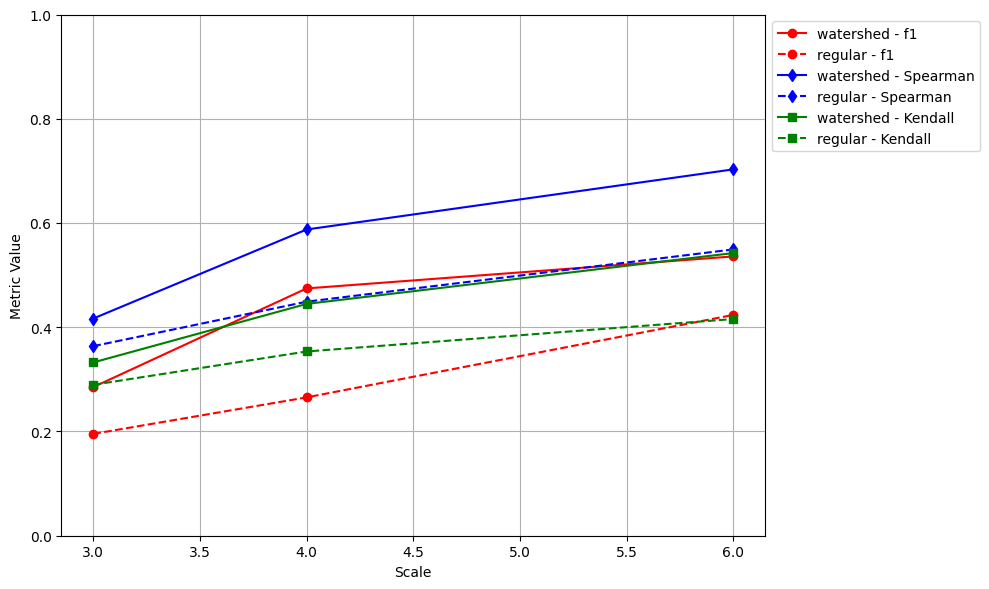

In [26]:
# Filter the data for scales 3, 4, and 6
df_filtered = df_sorted[df_sorted['Scale'].isin([3, 4, 6])]

bar_width = 0.35
index = np.arange(len(df_filtered['Scale'].unique()))

# Separate data for watershed and regular
watershed_data = df_filtered[df_filtered['Method'] == 'watershed'][metrics]
regular_data = df_filtered[df_filtered['Method'] == 'regular'][metrics]

fig, ax = plt.subplots(figsize=(10, 6))

line_styles = {'watershed': '-', 'regular': '--'}

for metric, color, marker in zip(metrics, colors, markers):
    for method in df_sorted['Method'].unique():
        subset = df_sorted[df_sorted['Method'] == method]
        ax.plot(subset['Scale'], subset[metric], marker=marker, linestyle=line_styles[method], 
                label=f'{method} - {metric}', color=color)
        ax.set_ylim(0, 1)

# Add labels and title
ax.set_xlabel('Scale')
ax.set_ylabel('Metric Value')
#ax.set_title('Comparison of Metrics Across Scales and Methods (Separated by Method)')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()
